In [1]:
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import math
from math import e

In [2]:
data = datasets.load_digits()
data.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = data['data']
Y = data['target']

In [4]:
X_train  = X[:int(0.8*X.shape[0])]
Y_train = Y[:len(X_train)]
X_test = X[len(X_train):]
Y_test = Y[len(Y_train):]

In [5]:
w_arr = []
w0_arr = []
ld = 0.0001
for i in range(10):
    w_arr.append(np.zeros([1,X_train.shape[1]]))
    w0_arr.append(0)

In [6]:
#f(x)
def fx(w, w0, x):
    return x.dot(w.transpose()) + w0

In [7]:
#soft_max for 1 case
def soft_max_minor(w,w_0, w_arr, w0_arr,x):
    nom = e**fx(w,w_0,x)
    denom = 0
    for i in range(10):
        denom += e**fx(w_arr[i],w0_arr[i],x)
    return nom/denom

In [8]:
#loga_w (w is vector)
def loga_w(w,w0, Y,X,c):
    res = 0
    for i in range(len(X)):
        mu = soft_max_minor(w,w0,w_arr,w0_arr,X[i])
        if c == Y[i]:
            res += (mu - 1)*X[i]
        else:
            res += (mu - 0)*X[i]
    return res        

#loga_w0(w0 is number)
def loga_w0(w,w0,Y,X,c):
    res = 0
    for i in range(len(X)):
        mu = soft_max_minor(w,w0,w_arr,w0_arr,X[i])
        if c == Y[i]:
            res += (mu - 1)
        else:
            res += (mu - 0)
    return res    

In [9]:
def standard(w):
    row = w.shape[0]
    col = w.shape[1]
    w = np.reshape(w,[1,row*col])
    square = 0
    for i in range(w.shape[1]):
        square += w[0][i]**2
    return math.sqrt(square) 

In [10]:
# w0_arr[1]

In [11]:
# w0_arr[1] = w0_arr[1] - ld*loga_w0(w_arr[1],w0_arr[1],Y_train,X_train,1)

In [12]:
# print(abs(w0_arr[1] - (w0_arr[1] - ld*loga_w0(w_arr[1],w0_arr[1],Y_train,X_train,1))))

In [13]:
# w_arr[1] 

In [14]:
# w_arr[1] = w_arr[1] - ld*loga_w(w_arr[1],w0_arr[1],Y_train,X_train,1)

In [15]:
# abs(standard(w_arr[1]) - standard(w_arr[1] - ld*loga_w(w_arr[1],w0_arr[1],Y_train,X_train,1).reshape(1,64)))

In [16]:
w_arr[0] = w_arr[0] - ld*loga_w(w_arr[0],w0_arr[0],Y_train,X_train,0)
w_arr[0]

array([[ 0.0000e+00, -3.7200e-03, -1.6570e-02,  1.7220e-02, -5.8700e-03,
        -3.9230e-02, -2.0100e-02, -2.0700e-03, -1.0000e-04, -1.4470e-02,
         3.2050e-02,  1.7080e-02,  1.0240e-02,  4.5710e-02, -1.0800e-02,
        -1.7100e-03, -5.0000e-05,  1.7610e-02,  6.2280e-02, -2.5490e-02,
        -7.1090e-02,  5.8410e-02,  2.8710e-02, -8.3000e-04, -2.0000e-05,
         3.9810e-02,  5.0390e-02, -1.0011e-01, -1.4125e-01,  2.1680e-02,
         6.1340e-02, -4.0000e-05,  0.0000e+00,  5.0480e-02,  5.2830e-02,
        -1.2030e-01, -1.4758e-01,  3.4500e-03,  6.0750e-02,  0.0000e+00,
        -1.3000e-04,  2.6830e-02,  8.9260e-02, -7.9350e-02, -8.9140e-02,
         4.4580e-02,  3.1790e-02, -4.5000e-04, -1.3000e-04,  8.2000e-04,
         7.7010e-02, -3.1000e-04,  1.0870e-02,  6.3540e-02, -1.9660e-02,
        -3.3800e-03, -1.0000e-05, -3.6800e-03, -2.0460e-02,  2.0300e-02,
         1.9010e-02, -2.4120e-02, -2.8610e-02, -6.3400e-03]])

In [17]:
for i in range(10):
    #epoch(training)
    w_arr[i] = w_arr[i] - ld*loga_w(w_arr[i],w0_arr[i],Y_train,X_train,i)
    w0_arr[i] = w0_arr[i] - ld*loga_w0(w_arr[i],w0_arr[i],Y_train,X_train,i)
    while( abs(standard(w_arr[i]) - standard(w_arr[i] - ld*loga_w(w_arr[i],w0_arr[i],Y_train,X_train,i).reshape(1,64))) > 10**(-3) or abs(w0_arr[i] - (w0_arr[i] - ld*loga_w0(w_arr[i],w0_arr[i],Y_train,X_train,i))) > 10**(-3)):
        w_arr[i] = w_arr[i] -ld*loga_w(w_arr[i],w0_arr[i],Y_train,X_train,i)
        w0_arr[i] = w0_arr[i] - ld*loga_w0(w_arr[i],w0_arr[i],Y_train,X_train,i)
        print(abs(standard(w_arr[i]) - standard(w_arr[i] - ld*loga_w(w_arr[i],w0_arr[i],Y_train,X_train,i).reshape(1,64))))
        print(abs(w0_arr[i] - (w0_arr[i] - ld*loga_w0(w_arr[i],w0_arr[i],Y_train,X_train,i))))
    print("\n")

0.04056356289879515
[0.00545155]
0.32029904744923454
[0.01374552]
5.1834617930797195
[0.12439214]
0.6078671874953328
[0.0143]
0.5493508604447843
[0.0143]
0.46967213622534043
[0.0143]
0.3632055499713589
[0.0143]
0.2274612259452815
[0.0143]
0.06794818004649361
[0.0143]
0.0014532759301650877
[0.00472219]
0.0012160103230298702
[0.00133331]
0.0007986996482283182
[0.00074151]


0.7263060244935282
[0.0146]
0.5243724358451846
[0.0146]
0.07798128821144967
[0.01459999]
3.7214046526948072
[0.09259892]
0.6854437122542594
[0.0146]
0.6196504827058567
[0.0146]
0.5113491029929613
[0.0146]
0.33733602800034523
[0.0146]
0.09097232614749373
[0.0146]
0.01607464314262863
[0.00207335]
0.018134591252896737
[0.00191345]
0.01398947541285489
[0.00133572]
0.015249130211125284
[0.00160331]
0.011883239553519775
[0.00126083]
0.013419312392743077
[0.00154439]
0.010259578467283426
[0.00124643]
0.01208764505171489
[0.00158599]
0.008935934975055737
[0.00130608]
0.010993752320082706
[0.00173658]
0.007720220632564612
[0.0

In [18]:
#soft_max
def soft_max(w_arr,w0_arr,x):
    max = 0
    numb = -1
    for i in range(10):
        z = fx(w_arr[i],w0_arr[i],x)
        res_minor = soft_max_minor(w_arr[i],w0_arr[i],w_arr,w0_arr,x)
        if res_minor > max:
            max = res_minor
            numb = i
    return numb        

In [19]:
X_test_sub = X_test[:50]
Y_test_sub = Y_test[:50]

err
err
err


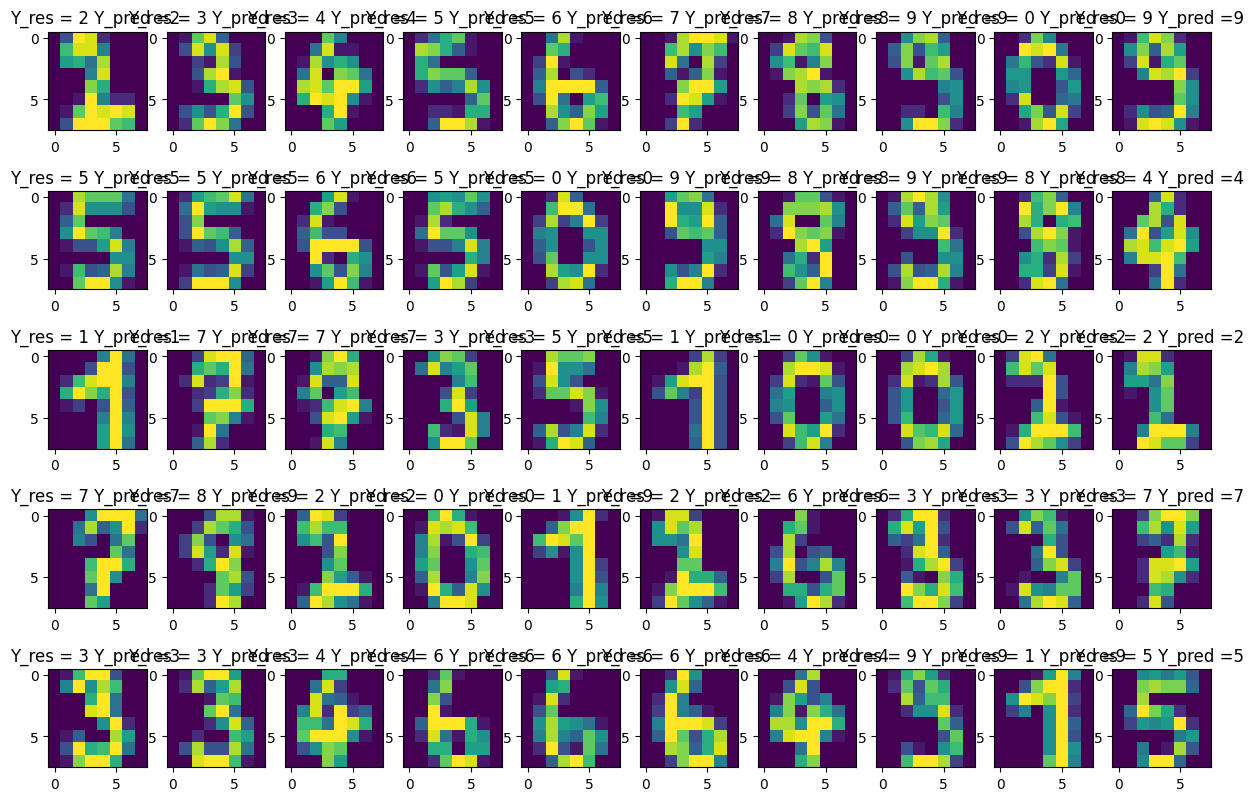

In [20]:
def draw_test(X_test,Y_test):
    fig,ax = plt.subplots(5,10,figsize = (15,10))
    for i in range(50):
        plt.subplot(5,10,i+1)
        plt.imshow(X_test[i].reshape((8,8)))
        pred = soft_max(w_arr,w0_arr,X_test[i])
        if Y_test[i] != pred:
            print("err")  
        plt.title(f"Y_res = {Y_test[i]} Y_pred ={pred} ")
draw_test(X_test_sub,Y_test_sub)